<a href="https://colab.research.google.com/github/bkn872/GL_Hackathon/blob/main/TVS_28_07_2022_19_00_05.09.2022%20check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
#
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
#
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import warnings
warnings.simplefilter("ignore")


## 1 Data Cleaning

### understand the Data

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.	Load Data (Both Train & Test Separately)

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_test=pd.read_csv('/content/drive/My Drive/Python/ht_tvs/Test_Set_TVS.csv')

In [7]:
data_train=pd.read_csv('/content/drive/My Drive/Python/ht_tvs/Train_Set_TVS.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.Understand the Data (check each of the following in both the train & test)

### a. Check Head & Tail

In [8]:
data_train.head()


,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,...,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,...,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,...,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,...,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [9]:
data_train.tail()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
132435,435665,641706.0,Y,1048272.0,13181.84,0.0238,IT,ndf,One,4.0,...,North,43.0,7.0,Yes,Yes,0.886,0.886,2766.0,5.0,1.0
132436,509840,594160.0,N,640232.0,11911.93,0.0262,IT,ndf,One,4.0,...,North,60.0,9.0,Yes,Yes,NaN,0.641,2581.0,1.0,0.0
132437,504105,1471170.0,N,732914.0,11587.54,NaN,Non-IT,ndf,One,4.0,...,South,51.0,4.0,Yes,Yes,0.384,0.384,1987.0,3.0,0.0
132438,430757,613585.0,N,528490.2,13008.76,0.0056,Non-IT,ndf,One,4.0,...,Central,59.0,14.0,Yes,Yes,0.224,0.224,1608.0,2.0,1.0
132439,421054,533725.0,Y,330222.0,10250.65,NaN,Govt.,ndf,Morethan_One,1.0,...,North,34.0,13.0,Yes,Yes,0.128,0.128,11.0,2.0,1.0


In [10]:
data_test.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,Y,809400.00,9145.51,0.0015,Govt.,ndf,Morethan_One,1.0,...,2.0,North,39.0,11.0,Yes,Yes,0.349,0.349,3133.0,2.0
1,533258,434150.0,N,72618.75,7683.23,0.0332,Govt.,ndf,One,4.0,...,3.0,Central,46.0,13.0,Yes,Yes,0.237,0.237,1730.0,5.0
2,581926,489060.0,N,267255.80,9032.85,0.0316,IT,ndf,Morethan_One,NaN,...,2.0,South,33.0,15.0,Yes,Yes,0.111,0.111,759.0,4.0
3,486301,957294.0,N,623600.00,12838.25,0.0320,IT,ndf,One,4.0,...,2.0,East,48.0,12.0,Yes,Yes,0.323,0.323,609.0,4.0
4,580822,1333739.0,N,529520.00,11799.09,0.0073,Non-IT,ndf,One,4.0,...,3.0,North,53.0,7.0,Yes,Yes,0.940,0.940,1222.0,1.0


In [11]:
data_test.tail()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
56755,513665,671640.0,N,260085.0,9654.50,0.0050,IT,ndf,One,4.0,...,2.0,North,42.0,11.0,Yes,Yes,0.716,0.716,215.0,7.0
56756,450327,650680.0,N,714467.6,14063.75,0.0321,NaN,ndf,One,NaN,...,3.0,East,47.0,9.0,Yes,Yes,NaN,0.193,22.0,0.0
56757,476417,551374.0,NaN,231420.0,11299.78,0.0334,Govt.,df,None,2.0,...,2.0,East,35.0,10.0,No,Yes,0.175,0.175,776.0,5.0
56758,461152,975117.0,N,1096620.0,10223.30,0.0052,IT,ndf,One,4.0,...,1.0,North,22.0,13.0,Yes,No,0.669,0.669,873.0,3.0
56759,524075,NaN,N,197232.0,12178.59,0.0155,IT,ndf,One,4.0,...,2.0,East,39.0,11.0,Yes,No,0.237,0.237,NaN,2.0


### b. Info, Describe

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  132440 non-null  int64  
 1   Compensation        126198 non-null  float64
 2   Vehicle_Status      123336 non-null  object 
 3   Loan_amt            132440 non-null  float64
 4   Annuity_amt         127829 non-null  float64
 5   density_Ind         127024 non-null  float64
 6   Job_Type            122192 non-null  object 
 7   Default_hist        132440 non-null  object 
 8   Prop_List           130475 non-null  object 
 9   Home_Appliances     121476 non-null  float64
 10  Region_Type         132440 non-null  object 
 11  Credit_Inq          129750 non-null  object 
 12  Education_det       132440 non-null  object 
 13  Marital_Stat        132440 non-null  object 
 14  Gen                 132440 non-null  object 
 15  Credit_Lnks         132440 non-nul

In [13]:
data_train.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
count,132440.000000,1.261980e+05,1.324400e+05,127829.000000,127024.000000,121476.000000,110595.000000,132440.000000,120709.000000,132440.00000,132440.000000,114927.000000,119119.000000,124287.000000,132440.000000,132440.000000
mean,488938.279319,7.450519e+05,4.148011e+05,10845.286442,0.020446,3.220891,6.580616,2.155467,2.030553,43.93326,12.060865,0.505929,0.506181,979.451383,3.387738,0.264301
std,58568.207772,4.702762e+05,2.746788e+05,2061.529355,0.015077,1.241751,6.357054,0.909046,0.503750,11.96270,3.566714,0.268665,0.268716,829.632194,2.173246,0.440962
min,387652.000000,1.527280e+05,3.427500e+04,5852.100000,0.000100,1.000000,0.000000,1.000000,1.000000,21.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,438095.500000,5.177060e+05,2.045300e+05,9348.370000,0.010400,2.000000,2.100000,2.000000,2.000000,34.00000,10.000000,0.268000,0.268000,288.000000,2.000000,0.000000
50%,488952.500000,6.659960e+05,3.495425e+05,10773.820000,0.020400,4.000000,4.600000,2.000000,2.000000,43.00000,12.000000,0.500000,0.500000,770.000000,3.000000,0.000000
75%,539702.000000,8.794890e+05,5.582050e+05,12165.390000,0.030400,4.000000,9.000000,3.000000,2.000000,54.00000,15.000000,0.769000,0.769000,1589.000000,5.000000,1.000000
max,590407.000000,7.037702e+07,2.872142e+06,41301.000000,2.017800,19.000000,48.100000,9.000000,3.000000,69.00000,25.000000,0.947000,0.947000,4309.000000,25.000000,1.000000


In [14]:
data_test.describe()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought
count,56760.000000,5.401000e+04,5.676000e+04,54797.000000,54485.000000,52001.000000,47409.000000,56760.000000,51707.000000,56760.000000,56760.000000,49397.000000,51105.000000,53238.00000,56760.000000
mean,489156.967089,7.423110e+05,4.145631e+05,10832.334840,0.020465,3.220688,6.590278,2.150828,2.028487,43.944327,12.079299,0.505408,0.506154,971.82118,3.399683
std,58459.598434,3.764809e+05,2.759849e+05,2060.269444,0.016790,1.240932,6.284459,0.909028,0.505052,11.979557,3.554178,0.268413,0.268316,825.51022,2.174527
min,387653.000000,1.483300e+05,3.477750e+04,6061.610000,0.000000,1.000000,0.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,10.00000,0.000000
25%,438878.000000,5.162055e+05,2.035587e+05,9344.360000,0.010400,2.000000,2.200000,2.000000,2.000000,34.000000,10.000000,0.268000,0.269000,284.00000,2.000000
50%,488939.500000,6.667440e+05,3.488628e+05,10756.450000,0.020300,4.000000,4.600000,2.000000,2.000000,43.000000,12.000000,0.431000,0.500000,767.00000,3.000000
75%,539700.500000,8.770300e+05,5.598608e+05,12142.340000,0.030500,4.000000,9.000000,3.000000,2.000000,54.000000,15.000000,0.769000,0.769000,1579.00000,5.000000
max,590401.000000,1.727617e+07,2.743640e+06,38116.000000,2.037200,19.000000,48.100000,9.000000,3.000000,69.000000,25.000000,0.941000,0.941000,4109.00000,26.000000


In [15]:
data_train.shape

(132440, 33)

In [16]:
data_test.shape

(56760, 32)

### Observations:

* Both data set have 29 features, Loan / No Loan is the target variable
* There are 87500 records in train data and 37500 records in test data
* Both have similar datatypes



### C. Null Values

In [17]:
data_train.isnull().sum()

ID                        0
Compensation           6242
Vehicle_Status         9104
Loan_amt                  0
Annuity_amt            4611
density_Ind            5416
Job_Type              10248
Default_hist              0
Prop_List              1965
Home_Appliances       10964
Region_Type               0
Credit_Inq             2690
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience            21845
Income_Alt             7682
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating        11731
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated              17513
c2_rated              13321
Contact_age            8153
Product_bought            0
Default                   0
dtype: int64

In [18]:
data_test.isnull().sum()

ID                       0
Compensation          2750
Vehicle_Status        3883
Loan_amt                 0
Annuity_amt           1963
density_Ind           2275
Job_Type              4320
Default_hist             0
Prop_List              911
Home_Appliances       4759
Region_Type              0
Credit_Inq            1166
Education_det            0
Marital_Stat             0
Gen                      0
Credit_Lnks              0
Experience            9351
Income_Alt            3299
Day_Process              0
Ph.No                    0
Type_Loan                0
Dependents               0
Company_Rating        5053
Region                   0
Age                      0
hour_Process             0
Addr_permanent           0
Permanent_Addr_tag       0
c1_rated              7363
c2_rated              5655
Contact_age           3522
Product_bought           0
dtype: int64

In [19]:
### Observation

|Train Data null values|Count|
|----------------------|-----|
|Yearly Income         |5575|
|Designation           |1414|
|Debt to Income        |3489|
|Postal Code           |1389|
|Total Unpaid CL       |4186|
|Unpaid Amount         | 4852|
----------------------------------------

|Test Data Null Values|Count|
|----------------------|-----|
|Yearly Income  |        2425|
|Designation|             586|
|Debt to Income  |       1511|
|Postal Code |            611|
|Total Unpaid CL|        1814|
|Unpaid Amount     |     2069|

Both Test data and Train have null values in same Features

In [20]:
data_train.median()

ID                 488952.5000
Compensation       665996.0000
Loan_amt           349542.5000
Annuity_amt         10773.8200
density_Ind             0.0204
Home_Appliances         4.0000
Experience              4.6000
Dependents              2.0000
Company_Rating          2.0000
Age                    43.0000
hour_Process           12.0000
c1_rated                0.5000
c2_rated                0.5000
Contact_age           770.0000
Product_bought          3.0000
Default                 0.0000
dtype: float64

### percentage of Null values in Train Data

In [21]:
# For missing data
percent_missing = data_train.isnull().sum() * 100 / len(data_train)
missing_value_df = pd.DataFrame({'column_name': data_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
Compensation,Compensation,4.713078
Vehicle_Status,Vehicle_Status,6.874056
Loan_amt,Loan_amt,0.000000
Annuity_amt,Annuity_amt,3.481577
density_Ind,density_Ind,4.089399
Job_Type,Job_Type,7.737844
Default_hist,Default_hist,0.000000
Prop_List,Prop_List,1.483691
Home_Appliances,Home_Appliances,8.278466


In [24]:
train_missing_columns=missing_value_df[percent_missing]>0

KeyError: ignored

In [25]:
df_filtered = missing_value_df.loc[(missing_value_df['percent_missing'] >0 )]

In [26]:
df_filtered

,column_name,percent_missing
Compensation,Compensation,4.713078
Vehicle_Status,Vehicle_Status,6.874056
Annuity_amt,Annuity_amt,3.481577
density_Ind,density_Ind,4.089399
Job_Type,Job_Type,7.737844
Prop_List,Prop_List,1.483691
Home_Appliances,Home_Appliances,8.278466
Credit_Inq,Credit_Inq,2.031108
Experience,Experience,16.494262
Income_Alt,Income_Alt,5.800362


In [27]:
null_cols=df_filtered['column_name']

In [28]:
null_cols

Compensation          Compensation
Vehicle_Status      Vehicle_Status
Annuity_amt            Annuity_amt
density_Ind            density_Ind
Job_Type                  Job_Type
Prop_List                Prop_List
Home_Appliances    Home_Appliances
Credit_Inq              Credit_Inq
Experience              Experience
Income_Alt              Income_Alt
Company_Rating      Company_Rating
c1_rated                  c1_rated
c2_rated                  c2_rated
Contact_age            Contact_age
Name: column_name, dtype: object

In [29]:
# For missing data
percent_missing = data_test.isnull().sum() * 100 / len(data_test)
missing_value_df = pd.DataFrame({'column_name': data_test.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
ID,ID,0.000000
Compensation,Compensation,4.844961
Vehicle_Status,Vehicle_Status,6.841085
Loan_amt,Loan_amt,0.000000
Annuity_amt,Annuity_amt,3.458421
density_Ind,density_Ind,4.008104
Job_Type,Job_Type,7.610994
Default_hist,Default_hist,0.000000
Prop_List,Prop_List,1.605004
Home_Appliances,Home_Appliances,8.384426


In [30]:
for cols in null_cols:
      print('data type of ',cols,'is ', data_train[cols].dtypes)

data type of  Compensation is  float64
data type of  Vehicle_Status is  object
data type of  Annuity_amt is  float64
data type of  density_Ind is  float64
data type of  Job_Type is  object
data type of  Prop_List is  object
data type of  Home_Appliances is  float64
data type of  Credit_Inq is  object
data type of  Experience is  float64
data type of  Income_Alt is  object
data type of  Company_Rating is  float64
data type of  c1_rated is  float64
data type of  c2_rated is  float64
data type of  Contact_age is  float64


In [31]:
for cols in null_cols:
    print(cols, ' has value counts ',len(data_train[cols].value_counts()))
    print(data_train[cols].value_counts())
    print("--"*60)
    #print('data type of ',cols, 'is ', data_test[cols].values_counts())

Compensation  has value counts  84095
669256.0     10
668304.0     10
452880.0     10
719880.0      9
536792.0      9
             ..
1059125.0     1
688233.0      1
801320.0      1
389129.0      1
533725.0      1
Name: Compensation, Length: 84095, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Vehicle_Status  has value counts  2
N    81370
Y    41966
Name: Vehicle_Status, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Annuity_amt  has value counts  117192
11522.15    5
11612.50    5
10920.87    4
8958.44     4
10199.06    4
           ..
9514.95     1
7547.20     1
11078.01    1
11874.53    1
10250.65    1
Name: Annuity_amt, Length: 117192, dtype: int64
------------------------------------------------------------------------------------------------------------------------
density_Ind  has value counts  417
0.0199 

### Imputing null values appropriately

In [32]:
## Method to check the missing value
def check_missingvlaue(data):
    percent_missing = round(data.isnull().sum() * 100 / len(data),2) #percentage of missing value
    missing_count=data.isnull().sum()
    missing_value_data = pd.DataFrame({'Feature Name': data.columns,
                                       'missing value count': missing_count,
                                       'percent_missing': percent_missing})
    print(missing_value_data)

In [33]:
check_missingvlaue(data_train)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0             0.00
Compensation              Compensation                 6242             4.71
Vehicle_Status          Vehicle_Status                 9104             6.87
Loan_amt                      Loan_amt                    0             0.00
Annuity_amt                Annuity_amt                 4611             3.48
density_Ind                density_Ind                 5416             4.09
Job_Type                      Job_Type                10248             7.74
Default_hist              Default_hist                    0             0.00
Prop_List                    Prop_List                 1965             1.48
Home_Appliances        Home_Appliances                10964             8.28
Region_Type                Region_Type                    0             0.00
Credit_Inq                  Credit_Inq                 2690             2.03

In [34]:
check_missingvlaue(data_test)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0             0.00
Compensation              Compensation                 2750             4.84
Vehicle_Status          Vehicle_Status                 3883             6.84
Loan_amt                      Loan_amt                    0             0.00
Annuity_amt                Annuity_amt                 1963             3.46
density_Ind                density_Ind                 2275             4.01
Job_Type                      Job_Type                 4320             7.61
Default_hist              Default_hist                    0             0.00
Prop_List                    Prop_List                  911             1.61
Home_Appliances        Home_Appliances                 4759             8.38
Region_Type                Region_Type                    0             0.00
Credit_Inq                  Credit_Inq                 1166             2.05

### Impute Designation with Unknown for Missing values

In [35]:
data_train.dropna(inplace=True)

In [36]:
data_test.dropna(inplace=True)

In [37]:
check_missingvlaue(data_train)

                          Feature Name  missing value count  percent_missing
ID                                  ID                    0              0.0
Compensation              Compensation                    0              0.0
Vehicle_Status          Vehicle_Status                    0              0.0
Loan_amt                      Loan_amt                    0              0.0
Annuity_amt                Annuity_amt                    0              0.0
density_Ind                density_Ind                    0              0.0
Job_Type                      Job_Type                    0              0.0
Default_hist              Default_hist                    0              0.0
Prop_List                    Prop_List                    0              0.0
Home_Appliances        Home_Appliances                    0              0.0
Region_Type                Region_Type                    0              0.0
Credit_Inq                  Credit_Inq                    0              0.0

In [38]:
data_train.head(10).T

,1,6,10,12,20,21,22,23,27,32
ID,511643,525234,495109,410196,400669,544155,564614,564243,483006,423123
Compensation,884222.0,757887.0,733560.0,864552.0,1273392.0,916864.0,705294.0,672418.0,424626.0,711864.0
Vehicle_Status,N,N,N,N,N,N,N,N,N,N
Loan_amt,198075.0,977270.0,225547.0,387888.0,400722.0,1422272.0,435168.0,787680.0,174400.0,748544.0
Annuity_amt,11173.06,10708.27,9563.82,8482.38,12955.32,15161.99,10142.68,10629.67,11097.34,10595.09
density_Ind,0.0194,0.0089,0.0345,0.0008,0.0172,0.0351,0.0079,0.002,0.0148,0.0242
Job_Type,IT,IT,IT,IT,Non-IT,Non-IT,Govt.,Non-IT,IT,IT
Default_hist,ndf,df,ndf,ndf,df,ndf,ndf,ndf,df,ndf
Prop_List,Morethan_One,None,One,One,None,One,One,One,None,Morethan_One
Home_Appliances,1.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,1.0


In [39]:
#data_train['Designation'] = data_train['Designation'].fillna('unknown')
#data_test['Designation'] = data_test['Designation'].fillna('unknown')

### Impute Median for Postal code

In [40]:
#data_train['Postal Code'].median()

In [41]:
#data_test['Postal Code'].median()

In [42]:
##data_train['Postal Code'] = data_train['Postal Code'].fillna(data_train['Postal Code'].median())

In [43]:
#data_test['Postal Code'] = data_test['Postal Code'].fillna(data_test['Postal Code'].median())

In [44]:
### All other float values will impute with mean

In [45]:
#null_cols=["Yearly Income",Designation",          
#"Debt to Income",        
#"Postal Code",            
#"Total Unpaid CL",       
#"Unpaid Amount"]

In [46]:
#data_train['Yearly Income'] = data_train['Yearly Income'].fillna(data_train['Yearly Income'].mean())
#data_train['Debt to Income'] = data_train['Debt to Income'].fillna(data_train['Debt to Income'].mean())
#data_train['Total Unpaid CL'] = data_train['Total Unpaid CL'].fillna(data_train['Total Unpaid CL'].mean())
#data_train['Unpaid Amount'] = data_train['Unpaid Amount'].fillna(data_train['Unpaid Amount'].mean())

In [47]:
#data_test['Yearly Income'] = data_test['Yearly Income'].fillna(data_test['Yearly Income'].mean())
#data_test['Debt to Income'] = data_test['Debt to Income'].fillna(data_test['Debt to Income'].mean())
#data_test['Total Unpaid CL'] = data_test['Total Unpaid CL'].fillna(data_test['Total Unpaid CL'].mean())
#data_test['Unpaid Amount'] = data_test['Unpaid Amount'].fillna(data_test['Unpaid Amount'].mean())

In [48]:
#check_missingvlaue(data_train)

In [49]:
#check_missingvlaue(data_test)

#### All missing values are imputed appropriately

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























In [50]:
data_train.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

In [51]:
data_test.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
dtype: object

For univariate analysis there are various ways. following are the common ways

* DistPlot<br>
* Pie Charts.<br>
* Box Plot

In [52]:
data_train.Default.nunique()

2

In [53]:
data_train.Default.value_counts()

0.0    34377
1.0    12407
Name: Default, dtype: int64

In [54]:
def plotDistPlot(data,col):
    sns.set_theme(); 
    plt.rcParams['figure.figsize'] = (7, 5)
    sns.distplot(data[col])
    plt.title('Distribution Plot for Feature '+col, fontsize = 20)
    plt.xlabel('Measurement of feature '+col)
    plt.show()


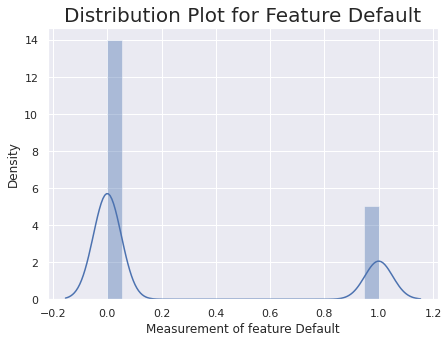

In [55]:
plotDistPlot(data_train,'Default')

In [60]:
# plotDistPlot(data_train,'Yearly Income')

In [61]:
# plotDistPlot(data_train,'Unpaid Amount')

In [62]:
# plotDistPlot(data_train,'Already Defaulted')

In [63]:
# cat_not=['ID']

### categorical Features

In [64]:
# categoricalColumns=[col for col in data_train.columns if data_train[col].dtype=='O' and col not in cat_not]
# categoricalColumns

In [65]:
# for col in data_train[categoricalColumns]:
#     print(col)
#     print(data_train[col].value_counts())
#     print('Number of values ',len(data_train[col].value_counts()))
  

In [66]:

# def buildPieChart(data):
#     colors = sns.color_palette('pastel')[0:5]
#    # categoricalColumns=findCategoricalData(data)
#    # print(categoricalColumns)
#     for col in data[categoricalColumns]:
#         if (col=='Designation'):
#             print(' Designation is Excluded for piechart')
#         else:
#             fig, ax = plt.subplots(figsize=(8,8))
#             plt.title("Pie chart for "+ col)
#             data[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
#             plt.show()
    

In [68]:

# buildPieChart(data_train)

In [69]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,46784.0,488603.161829,58227.207505,387656.0000,438527.7500,487052.0000,538861.2500,5.904060e+05
Compensation,46784.0,767294.827291,477249.862987,166212.0000,536337.0000,686460.5000,899806.5000,6.305288e+07
Loan_amt,46784.0,422196.075085,277973.925064,34275.0000,209440.5250,355454.1500,565228.2000,2.872142e+06
Annuity_amt,46784.0,10906.654889,2074.688470,5951.9800,9410.0925,10832.7100,12239.9225,4.130100e+04
density_Ind,46784.0,0.020360,0.014787,0.0001,0.0104,0.0202,0.0303,2.017800e+00
Home_Appliances,46784.0,3.095289,1.295899,1.0000,2.0000,4.0000,4.0000,1.900000e+01
Experience,46784.0,6.560640,6.324152,0.0000,2.1000,4.6000,9.0000,4.800000e+01
Dependents,46784.0,2.239997,0.940771,1.0000,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,46784.0,2.022935,0.508534,1.0000,2.0000,2.0000,2.0000,3.000000e+00
Age,46784.0,40.962829,10.469024,21.0000,32.0000,40.0000,49.0000,6.900000e+01


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Check for duplicate values in the data and impute with the best suitable approach

In [70]:
data_train.duplicated().sum()

0

There are no duplicates available

In [71]:
# for feature in data_train.columns: # Loop through all columns in the dataframe
#     if data_train[feature].dtype == 'object':
#             print(feature)

The above are Object data types

In [72]:
# for col in data_train[categoricalColumns]:
#     #print(col)
#     ##print(data_train[col].value_counts())
#     print(col, ' has value counts ',len(data_train[col].value_counts()))

In [73]:
# for col in data_train[categoricalColumns]:
#     print(col, ' has value counts ',len(data_train[col].value_counts()))
#     print('--'*60)
#     print(data_train[col].value_counts())
#     print('--'*60)
   

In [74]:
# for col in data_train[categoricalColumns]:
#     print(col, ' has value counts ',len(data_train[col].value_counts()))
#     print('--'*60)
#     #print(data_train[col].value_counts())
#     #print('--'*60)

Above are the categorical values having different value counts;
* The Designation is having 40354 different values


In [79]:
# colors = sns.color_palette('pastel')[0:5]
# col='State'
# fig, ax = plt.subplots(figsize=(8,8))
# plt.title("Pie chart for "+ col)
# data_train[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
# plt.show()

In [76]:
### Count plot
# def buildPieChart(data):
    # colors = sns.color_palette('pastel')[0:5]
   # categoricalColumns=findCategoricalData(data)
   # print(categoricalColumns)
    # for col in data[categoricalColumns]:
        # if (col=='Designation'):
        #     print(' Designation is Excluded for piechart')
        # else:
        #     #fig, ax = plt.subplots(figsize=(8,8))
        #     sns.countplot(x=column, data=data_train)
        # #plt.show()

In [77]:
# for col in data_train[categoricalColumns]:
    
#     if (col=='Designation'):
#         print(' Designation is Excluded for piechart')
#     else:
#         sns.countplot(x=col, data=data_train)
#         plt.show()

NameError: ignored

#### Data understanding


|S.No | Feature Name |Feature Description| 
|---:|:-------------|:-------------|
| 1 | ID | Unique ID |
| 2 | Asst_Reg| Value of all the assets registered under the borrowers name | 
| 3 | GGGrade| Grant Group Grade | 
| 4 | Experience| Total year of work experience of the borrower |
| 5 | Validation| Validation status of the borrower |
| 6 | Yearly Income| total yearly income of the borrower | 
| 7 | Home Status| Borrower living status | continuous    | Car weight|
| 8 | Unpaid 2 years| no.of times the Borrower has defaulted in last two years |
| 9 | Already Defaulted | Number of other loans the borrower was default | 
| 10 | Designation| Designation of Borrower |
| 11 | Debt to Income| Debt to Income ratio | 
| 12 | Postal Code| Postal code of borrower |
| 13 | Lend Amount| total funded amount to borrower | 
| 14 | Deprecatory Records| An entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services |
| 15 | Interest Charged| Interest charged on total amount |
| 16 | Usage Rate | Processing Charges on the Loan Amount | 
| 17 | Inquiries| Inquiries in Last 6 Months |
| 18 | Present Balance| Current balance in the borrower account |
| 19 | Gross Collection | The gross amount payable by way of Settlement or judgment in respect of the Claims, excluding any costs | 
| 20 | Sub GGGrade| Sub Grant Group Grade | 
| 21 | File Status | Status of the loan file |
| 22 | State | State to which borrower belong  | 
| 23 | Account Open  | Total number of open accounts in the name of Borrower | 
| 24 | Total Unpaid CL | Unpaid dues on all the other loans | multi-valued discrete |origin location |
| 25 | Duration | Duration for the amount is funded to borrower | 
| 26 | Unpaid Amount | Unpaid balance on the credit card |
| 27 | Reason | Reason for loan application |
| 28 | Claim Type | Amongst all Application type what is the borrower Claim Type I - Individual Account , J - Joint Account | 
| 29 | Due Fee     | Charges incurred if the payment on loan amount is delayed | 
| 30 | Loan/No Loan    | Target Variable |

### Visualise Loan /no Loan

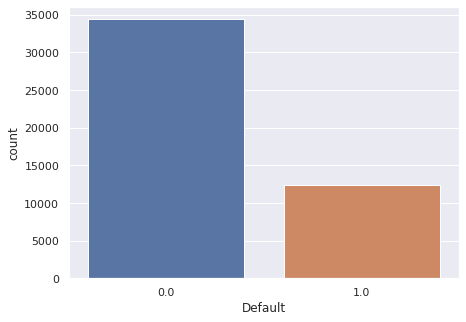

In [80]:
#visualize the LoanOnCard
sns.countplot(x='Default',data=data_train)  
plt.show()  

In [81]:
data_train['Default'].value_counts()

0.0    34377
1.0    12407
Name: Default, dtype: int64

In [ ]:
### Bivariate Analysis

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Plot a pairplot for all features.

In [82]:
corr =data_train.corr()
print(corr)

                       ID  Compensation  Loan_amt  Annuity_amt  density_Ind  \
ID               1.000000      0.007771  0.001461     0.003180    -0.004765   
Compensation     0.007771      1.000000  0.265076     0.242759     0.003072   
Loan_amt         0.001461      0.265076  1.000000     0.486039     0.006586   
Annuity_amt      0.003180      0.242759  0.486039     1.000000     0.005049   
density_Ind     -0.004765      0.003072  0.006586     0.005049     1.000000   
Home_Appliances -0.003303      0.003752  0.018857     0.003690     0.000321   
Experience      -0.007039      0.025465  0.076418     0.035113    -0.001784   
Dependents       0.005356     -0.000931  0.035091     0.034511     0.004152   
Company_Rating   0.003255     -0.177712 -0.109739    -0.101109    -0.013594   
Age             -0.006478      0.030697  0.123724     0.049686    -0.000552   
hour_Process    -0.000535      0.056443  0.033218     0.013890     0.001600   
c1_rated         0.007286     -0.011888  0.006862   

Text(0.5, 1.0, 'Heat map of Customer data')

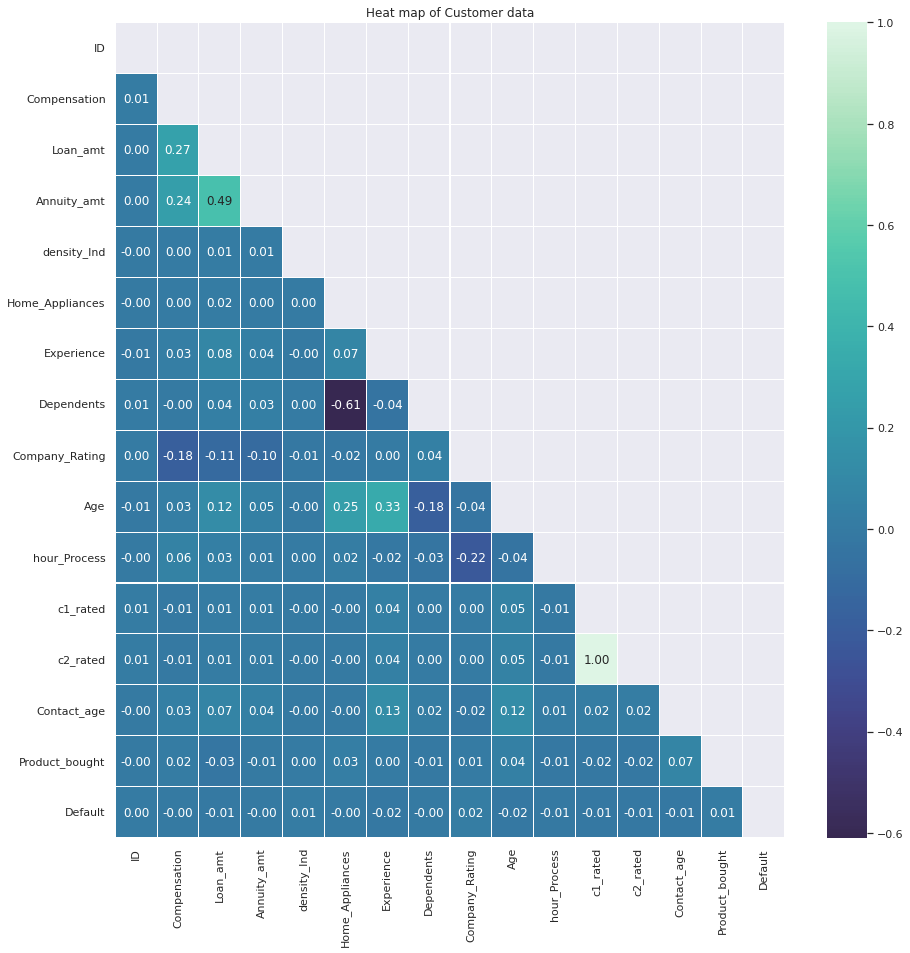

In [83]:
fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(df2.corr(), center=0, cmap='BrBG', annot=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data_train.corr(), center=0, cmap='mako', annot=True, fmt='.2f', linewidths=0.05, mask=mask)
ax.set_title('Heat map of Customer data')

In [84]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Home_Appliances  Dependents         0.609797
Dependents       Home_Appliances    0.609797
dtype: float64

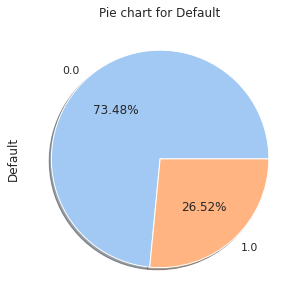

In [86]:
col='Default'
colors = sns.color_palette('pastel')[0:5]
plt.title("Pie chart for "+ col)
data_train[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
plt.show()

81% of the data has Loan/NoLoan value 0 and nearly 19% has 1 value

### Detecting outliers

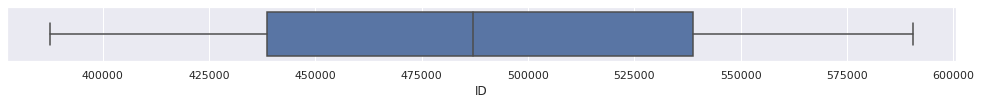

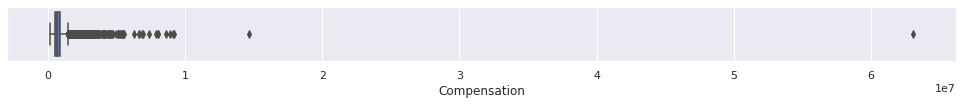

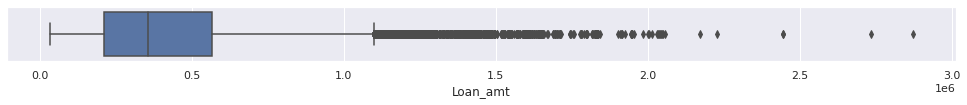

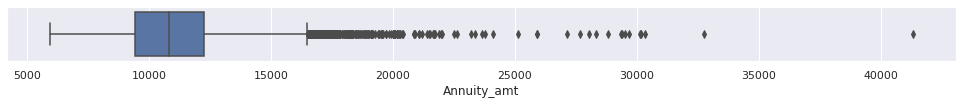

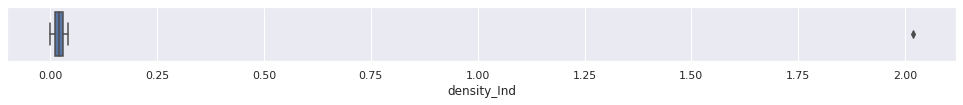

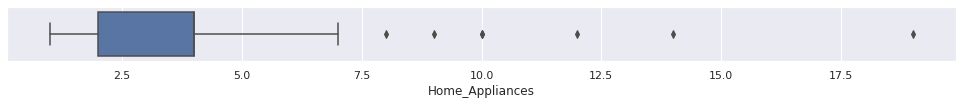

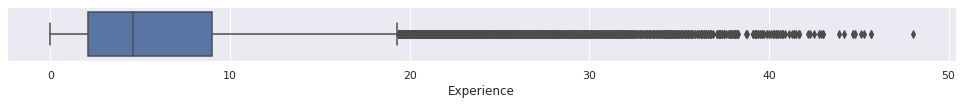

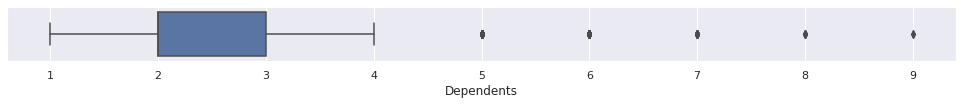

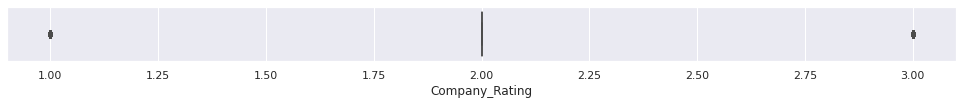

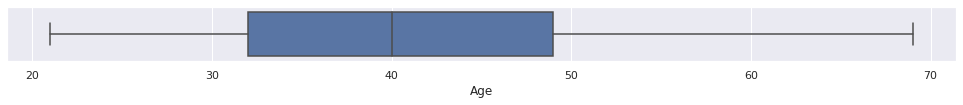

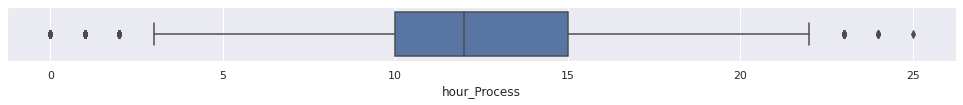

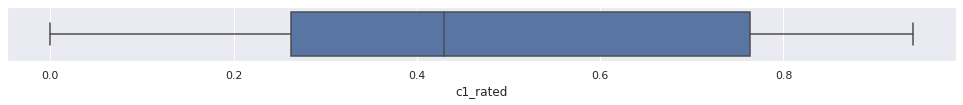

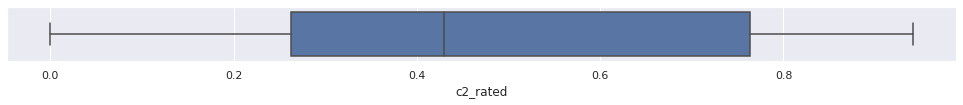

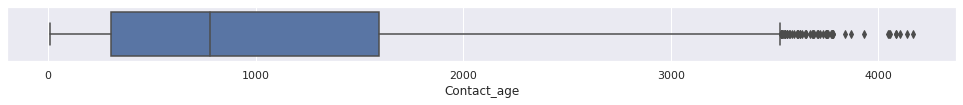

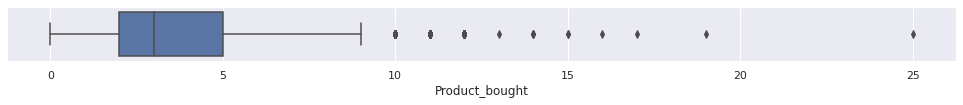

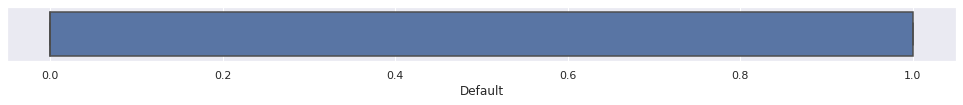

In [87]:
import matplotlib.pyplot as plt
data_train_tmp=data_train.select_dtypes(exclude=['object'])

for column in data_train_tmp:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data_train_tmp, x=column)

In [88]:
# samevalue_columns=[]
# for col in cols:
#     if(data_train[col].nunique()==1):##if value count for a column is 1 it signifies same values
#        samevalue_columns.append(col)##
#        #print(col)
# print('number of columns',len(samevalue_columns))

KeyError: ignored

In [89]:
cols= data_train.columns
cols

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

In [90]:
samevalue_columns=[]
for col in cols:
    if(data_train[col].nunique()==1):##if value count for a column is 1 it signifies same values
       samevalue_columns.append(col)##
       #print(col)
print('number of columns',len(samevalue_columns))

number of columns 0


In [92]:
data=data_train.copy()

In [93]:
data.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,...,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
6,525234,757887.0,N,977270.0,10708.27,0.0089,IT,df,None,2.0,...,South,36.0,12.0,Yes,Yes,0.142,0.142,721.0,3.0,1.0
10,495109,733560.0,N,225547.0,9563.82,0.0345,IT,ndf,One,4.0,...,North,24.0,10.0,Yes,Yes,0.569,0.569,15.0,3.0,1.0
12,410196,864552.0,N,387888.0,8482.38,0.0008,IT,ndf,One,4.0,...,North,59.0,11.0,Yes,Yes,0.723,0.723,1282.0,1.0,0.0
20,400669,1273392.0,N,400722.0,12955.32,0.0172,Non-IT,df,None,3.0,...,Central,35.0,14.0,Yes,Yes,0.631,0.631,1514.0,3.0,0.0


In [94]:
data.dtypes


ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

## 3 Feature Engineering

In [95]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        #cdata[feature] = pd.Categorical(cdata[feature])# Replace strings with an integer
#cdata.head(10)

Vehicle_Status
Job_Type
Default_hist
Prop_List
Region_Type
Credit_Inq
Education_det
Marital_Stat
Gen
Credit_Lnks
Income_Alt
Day_Process
Ph.No
Type_Loan
Region
Addr_permanent
Permanent_Addr_tag


In [96]:
data.dtypes

ID                      int64
Compensation          float64
Vehicle_Status         object
Loan_amt              float64
Annuity_amt           float64
density_Ind           float64
Job_Type               object
Default_hist           object
Prop_List              object
Home_Appliances       float64
Region_Type            object
Credit_Inq             object
Education_det          object
Marital_Stat           object
Gen                    object
Credit_Lnks            object
Experience            float64
Income_Alt             object
Day_Process            object
Ph.No                  object
Type_Loan              object
Dependents            float64
Company_Rating        float64
Region                 object
Age                   float64
hour_Process          float64
Addr_permanent         object
Permanent_Addr_tag     object
c1_rated              float64
c2_rated              float64
Contact_age           float64
Product_bought        float64
Default               float64
dtype: obj

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Make sure all the variables with continuous values are of ‘Float’ type.



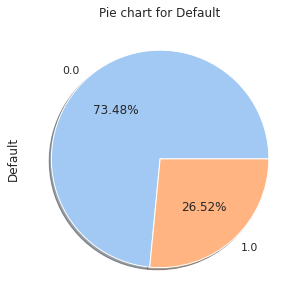

In [97]:
col='Default'
colors = sns.color_palette('pastel')[0:5]
plt.title("Pie chart for "+ col)
data_train[col].value_counts().plot.pie(autopct='%1.2f%%',shadow=True, colors=colors)
plt.show()

In [98]:
data_train["Default"].value_counts()

0.0    34377
1.0    12407
Name: Default, dtype: int64

### c.Encode the object variables in both the train & test

In [99]:
new_data_train=data_train.copy()
new_data_test=data_test.copy()


In [100]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        print(data[feature].value_counts())

Vehicle_Status
N    29358
Y    17426
Name: Vehicle_Status, dtype: int64
Job_Type
IT        25556
Non-IT    11374
Govt.      9854
Name: Job_Type, dtype: int64
Default_hist
ndf    41278
df      5506
Name: Default_hist, dtype: int64
Prop_List
One             30562
Morethan_One    10748
None             5474
Name: Prop_List, dtype: int64
Region_Type
Metro    38113
Rural     7774
other      897
Name: Region_Type, dtype: int64
Credit_Inq
1     28547
2     13096
>4     3870
3      1271
Name: Credit_Inq, dtype: int64
Education_det
Grad      32235
P_Grad    12236
Other      2313
Name: Education_det, dtype: int64
Marital_Stat
Married    35105
Single      7379
Divorce     2879
Widow       1421
Name: Marital_Stat, dtype: int64
Gen
M    29228
F    17556
Name: Gen, dtype: int64
Credit_Lnks
1_to_3    41000
4_to_6     5177
>6          607
Name: Credit_Lnks, dtype: int64
Income_Alt
Not_Specified    33899
Y                12885
Name: Income_Alt, dtype: int64
Day_Process
Tue     8096
wed     7891
mon    

In [104]:
oneHotCols=[]

In [103]:
# Gen
# M    29228
# F    17556

In [106]:
replaceStruct = {
                "Vehicle_Status":     {"N": 0, "Y": 1,},
                "Gen":     {"M": 0, "F": 1,},
                "Permanent_Addr_tag":     {"No": 0, "Yes": 1,},
                "Ph.No":     {"No": 0, "Yes": 1,},
                "Addr_permanent":     {"No": 0, "Yes": 1,},    
                "Job_Type":     {"IT": 1, "Non-IT": 2, "Govt.": 3,},
                "Default_hist":     {"ndf": 1, "df": 0,},
                "Prop_List":     {"One": 1, "Morethan_One": 2, "None": 0,},
                "Region_Type":     {"Metro": 1, "Rural": 2, "other": 0,},
                "Credit_Inq":     {">4": 4,"1": 1, "2": 2, "3": 3,},
                "Education_det":      {"Grad": 1, "P_Grad": 2, "Other": 3,},
                "Marital_Stat":  { "Married": 1,"Single":2, "Divorce":3, "Widow":4},
                "Credit_Lnks":  {"1_to_3": 1, "4_to_6": 2, ">6": 3,},
                "Income_Alt":     {"Not_Specified": 0, "Y": 1,},
                "Day_Process":  { "Sun": 0,"mon": 1,"Tue":2, "wed":3, "thur":4,"Fri":4,"SAT":4},
                "Type_Loan":     {"CLoan": 1, "RLoan": 2,},   
                "Region":  { "North": 1,"East":2, "Central":3, "South":4}
                              
                    }

In [107]:
encoded_train_data=new_data_train.replace(replaceStruct)
encoded_train_data=pd.get_dummies(encoded_train_data, columns=oneHotCols)



# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Designation'.
encoded_train_data['Designation']= label_encoder.fit_transform(encoded_train_data['Designation'])

# Encode labels in column 'State'.
encoded_train_data['State']= label_encoder.fit_transform(encoded_train_data['State'])
  
encoded_train_data['State'].unique()

In [109]:
encoded_train_data.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
1,511643,884222.0,0,198075.0,11173.06,0.0194,1,1,2,1.0,...,1,46.0,12.0,1,1,0.184,0.184,306.0,4.0,0.0
6,525234,757887.0,0,977270.0,10708.27,0.0089,1,0,0,2.0,...,4,36.0,12.0,1,1,0.142,0.142,721.0,3.0,1.0
10,495109,733560.0,0,225547.0,9563.82,0.0345,1,1,1,4.0,...,1,24.0,10.0,1,1,0.569,0.569,15.0,3.0,1.0
12,410196,864552.0,0,387888.0,8482.38,0.0008,1,1,1,4.0,...,1,59.0,11.0,1,1,0.723,0.723,1282.0,1.0,0.0
20,400669,1273392.0,0,400722.0,12955.32,0.0172,2,0,0,3.0,...,3,35.0,14.0,1,1,0.631,0.631,1514.0,3.0,0.0


#### Encoding the Test data


In [110]:
encoded_test_data=new_data_test.replace(replaceStruct)
encoded_test_data=pd.get_dummies(encoded_test_data, columns=oneHotCols)


# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Designation'.
encoded_test_data['Designation']= label_encoder.fit_transform(encoded_test_data['Designation'])

# Encode labels in column 'State'.
encoded_test_data['State']= label_encoder.fit_transform(encoded_test_data['State'])
  
encoded_test_data['State'].unique()

In [111]:
encoded_test_data.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,1,809400.00,9145.51,0.0015,3,1,2,1.0,...,2.0,1,39.0,11.0,1,1,0.349,0.349,3133.0,2.0
1,533258,434150.0,0,72618.75,7683.23,0.0332,3,1,1,4.0,...,3.0,3,46.0,13.0,1,1,0.237,0.237,1730.0,5.0
3,486301,957294.0,0,623600.00,12838.25,0.0320,1,1,1,4.0,...,2.0,2,48.0,12.0,1,1,0.323,0.323,609.0,4.0
6,469888,365076.0,1,957043.20,16450.51,0.0327,2,1,1,4.0,...,2.0,2,62.0,15.0,1,1,0.275,0.275,1147.0,2.0
8,567067,621504.0,1,232066.80,11930.35,0.0189,1,1,2,1.0,...,2.0,1,28.0,14.0,0,1,0.286,0.286,1470.0,4.0


**Comments**:<br>No Loan (81.13%) is more compared to Loan Data(nearly 18.87%).Target value is imbalanced.
* Synthetic Minority Oversampling Technique (SMOTE) will be used to balance the imbalanced data

In [112]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [113]:
for feature in encoded_train_data.columns: # Loop through all columns in the dataframe
    if encoded_train_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        print(feature)
        print(encoded_train_data[feature].value_counts())

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data pre-processing: <br>
    
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#00b3e5;"> Segregate predictors vs target attributes. 

In [114]:
#Split data into Predictors(X) and Target Attributs(y)

X = encoded_train_data.drop(labels= ['Default'] , axis = 1)
y = encoded_train_data["Default"]
X.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
1,511643,884222.0,0,198075.0,11173.06,0.0194,1,1,2,1.0,...,1.0,1,46.0,12.0,1,1,0.184,0.184,306.0,4.0
6,525234,757887.0,0,977270.0,10708.27,0.0089,1,0,0,2.0,...,2.0,4,36.0,12.0,1,1,0.142,0.142,721.0,3.0
10,495109,733560.0,0,225547.0,9563.82,0.0345,1,1,1,4.0,...,2.0,1,24.0,10.0,1,1,0.569,0.569,15.0,3.0
12,410196,864552.0,0,387888.0,8482.38,0.0008,1,1,1,4.0,...,3.0,1,59.0,11.0,1,1,0.723,0.723,1282.0,1.0
20,400669,1273392.0,0,400722.0,12955.32,0.0172,2,0,0,3.0,...,2.0,3,35.0,14.0,1,1,0.631,0.631,1514.0,3.0


In [115]:
X.shape

(46784, 32)

In [116]:
y.shape

(46784,)

In [117]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [118]:
X_resampled.shape

(68754, 32)

In [119]:
y_resampled.shape

(68754,)

In this section you can implement the feature engineering techniques for dimensionality reduction












<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Perform train-test split and standardise the data or vice versa if required.

In [120]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((55003, 32), (13751, 32), (55003,), (13751,))

In [121]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((37427, 32), (9357, 32), (37427,), (9357,))

In [122]:
X_train.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
95401,390861,572840.0,0,162510.00,9704.55,0.0399,1,1,1,4.0,...,3.0,1,21.0,9.0,0,1,0.233,0.233,356.0,8.0
128983,549329,851445.0,0,677952.90,13843.24,0.0318,2,1,2,1.0,...,1.0,3,36.0,6.0,1,1,0.277,0.277,1703.0,3.0
123999,584728,946803.0,0,461120.00,8010.78,0.0070,2,1,1,4.0,...,1.0,2,49.0,10.0,1,1,0.223,0.223,1752.0,4.0
52460,522932,604276.0,0,484126.65,11450.04,0.0190,2,1,1,4.0,...,1.0,4,59.0,14.0,1,1,0.266,0.266,880.0,2.0
14816,489350,688200.0,1,400395.00,14888.66,0.0044,1,1,2,1.0,...,2.0,1,37.0,11.0,0,1,0.216,0.216,20.0,0.0


In [123]:
std_col_names=X.columns

In [124]:
std_col_names

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

In [125]:
std_col_names=std_col_names.drop('ID')

In [126]:
std_col_names

Index(['Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

In [127]:
X_train.set_index('ID', inplace=True)
X_valid.set_index('ID', inplace=True)

In [128]:
X_train.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
ID,,,,,,,,,,,,,,,,,,,,,
390861,572840.0,0,162510.00,9704.55,0.0399,1,1,1,4.0,1,...,3.0,1,21.0,9.0,0,1,0.233,0.233,356.0,8.0
549329,851445.0,0,677952.90,13843.24,0.0318,2,1,2,1.0,1,...,1.0,3,36.0,6.0,1,1,0.277,0.277,1703.0,3.0
584728,946803.0,0,461120.00,8010.78,0.0070,2,1,1,4.0,1,...,1.0,2,49.0,10.0,1,1,0.223,0.223,1752.0,4.0
522932,604276.0,0,484126.65,11450.04,0.0190,2,1,1,4.0,1,...,1.0,4,59.0,14.0,1,1,0.266,0.266,880.0,2.0
489350,688200.0,1,400395.00,14888.66,0.0044,1,1,2,1.0,1,...,2.0,1,37.0,11.0,0,1,0.216,0.216,20.0,0.0


In [129]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index,columns = X_train.columns)
X_valid_std = pd.DataFrame(sc.fit_transform(X_valid),index=X_valid.index,columns = X_valid.columns)
#X_train_std=sc.fit_transform(X_train)
#X_test_std=sc.fit_transform(X_test)

In [130]:
X_train_std.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
ID,,,,,,,,,,,,,,,,,,,,,
390861,-0.390068,-0.770446,-0.932779,-0.579175,1.259665,-0.830405,0.363399,-0.198071,0.696839,-0.363178,...,1.925179,-1.236932,-1.909909,-0.888169,-3.208365,0.522106,-0.997964,-0.997964,-0.756546,2.167491
549329,0.170232,-0.770446,0.921686,1.415513,0.737185,0.415718,0.363399,1.534388,-1.616160,-0.363178,...,-2.020049,0.562981,-0.475801,-1.721638,0.311685,0.522106,-0.833997,-0.833997,0.868176,-0.164653
584728,0.362006,-0.770446,0.141563,-1.395506,-0.862507,0.415718,0.363399,-0.198071,0.696839,-0.363178,...,-2.020049,-0.336976,0.767093,-0.610346,0.311685,0.522106,-1.035229,-1.035229,0.927278,0.301776
522932,-0.326847,-0.770446,0.224336,0.262083,-0.088463,0.415718,0.363399,-0.198071,0.696839,-0.363178,...,-2.020049,1.462937,1.723165,0.500945,0.311685,0.522106,-0.874989,-0.874989,-0.124509,-0.631081
489350,-0.158069,1.297949,-0.076914,1.919364,-1.030217,-0.830405,0.363399,1.534388,-1.616160,-0.363178,...,-0.047435,-1.236932,-0.380194,-0.332524,-3.208365,0.522106,-1.061314,-1.061314,-1.161822,-1.563939


In [131]:
X_train_std.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
ID,,,,,,,,,,,,,,,,,,,,,
390861,-0.390068,-0.770446,-0.932779,-0.579175,1.259665,-0.830405,0.363399,-0.198071,0.696839,-0.363178,...,1.925179,-1.236932,-1.909909,-0.888169,-3.208365,0.522106,-0.997964,-0.997964,-0.756546,2.167491
549329,0.170232,-0.770446,0.921686,1.415513,0.737185,0.415718,0.363399,1.534388,-1.616160,-0.363178,...,-2.020049,0.562981,-0.475801,-1.721638,0.311685,0.522106,-0.833997,-0.833997,0.868176,-0.164653
584728,0.362006,-0.770446,0.141563,-1.395506,-0.862507,0.415718,0.363399,-0.198071,0.696839,-0.363178,...,-2.020049,-0.336976,0.767093,-0.610346,0.311685,0.522106,-1.035229,-1.035229,0.927278,0.301776
522932,-0.326847,-0.770446,0.224336,0.262083,-0.088463,0.415718,0.363399,-0.198071,0.696839,-0.363178,...,-2.020049,1.462937,1.723165,0.500945,0.311685,0.522106,-0.874989,-0.874989,-0.124509,-0.631081
489350,-0.158069,1.297949,-0.076914,1.919364,-1.030217,-0.830405,0.363399,1.534388,-1.616160,-0.363178,...,-0.047435,-1.236932,-0.380194,-0.332524,-3.208365,0.522106,-1.061314,-1.061314,-1.161822,-1.563939


## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1 [Best Model]


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Supervised Learning technique to train a model



In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [133]:
colnames = ['accuracy','accuracy_cv_score','accuracy_cv_stddev',
                'precision_score','recall_score','f1_score',
                'roc_auc_score (cross_val_score)']
model_scores = []
model_stats = {}
model_columns=['accuracy','accuracy_mean_score','accuracy_stdfev','precision','recall','f1_score']

In [134]:
model_scores = []

In [135]:

lr_model = LogisticRegression()
lr_model.fit(X_train_std, y_train)
y_pred = lr_model.predict(X_valid_std)

# evaluate accuracy
print('accuracy score for Logistic Regression',accuracy_score(y_valid, y_pred))
predictions=lr_model.predict(X_valid_std)
lr_model.score(X_valid_std, y_valid)
model_scores.append(lr_model.score(X_valid_std, y_valid))
model_scores.append('NA')
model_scores.append('NA')

predictions_train=lr_model.predict(X_train_std)
print('accuracy score when Logistic Regression -Training set',accuracy_score(y_train, predictions_train))


accuracy score for Logistic Regression 0.7428663033023405
accuracy score when Logistic Regression -Training set 0.7328132097149117


In [136]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [137]:
 #important
 # calculate precision and recall
p = precision_score(y_valid, predictions)
r = recall_score(y_valid, predictions)
model_scores.append(p)
model_scores.append(r)
print('precision',p)
print('recall',r)
 # calculate F1 score
f1_score = 2*(p*r)/(p+r)
model_scores.append(f1_score)
print('f1_score',f1_score)

precision 0.0
recall 0.0
f1_score nan


In [138]:
 model_stats['LogisticRegression Basic Model'] = model_scores

In [139]:
df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index', columns=model_columns)

In [140]:
df_model_stats

,accuracy,accuracy_mean_score,accuracy_stdfev,precision,recall,f1_score
LogisticRegression Basic Model,0.742866,NA,NA,0.0,0.0,NaN


In [141]:
encoded_test_data.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,1,809400.00,9145.51,0.0015,3,1,2,1.0,...,2.0,1,39.0,11.0,1,1,0.349,0.349,3133.0,2.0
1,533258,434150.0,0,72618.75,7683.23,0.0332,3,1,1,4.0,...,3.0,3,46.0,13.0,1,1,0.237,0.237,1730.0,5.0
3,486301,957294.0,0,623600.00,12838.25,0.0320,1,1,1,4.0,...,2.0,2,48.0,12.0,1,1,0.323,0.323,609.0,4.0
6,469888,365076.0,1,957043.20,16450.51,0.0327,2,1,1,4.0,...,2.0,2,62.0,15.0,1,1,0.275,0.275,1147.0,2.0
8,567067,621504.0,1,232066.80,11930.35,0.0189,1,1,2,1.0,...,2.0,1,28.0,14.0,0,1,0.286,0.286,1470.0,4.0


In [142]:
# evaluate accuracy
print('accuracy score when Logistic Regression',accuracy_score(y_valid, predictions))
#print('accuracy score Train when Logistic Regression',accuracy_score(y_train, predictions))
print(classification_report(y_valid, predictions))

accuracy score when Logistic Regression 0.7428663033023405
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      6951
         1.0       0.00      0.00      0.00      2406

    accuracy                           0.74      9357
   macro avg       0.37      0.50      0.43      9357
weighted avg       0.55      0.74      0.63      9357



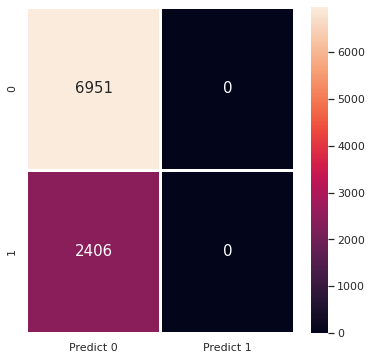

In [143]:
# calculate accuracy measures and confusion matrix
cm=metrics.confusion_matrix(y_valid, predictions, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True,linewidths=2, linecolor='white', fmt='g', annot_kws={"size":15}) 

In [144]:
encoded_test_data.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought'],
      dtype='object')

In [145]:
encoded_test_data.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
0,487410,653106.0,1,809400.00,9145.51,0.0015,3,1,2,1.0,...,2.0,1,39.0,11.0,1,1,0.349,0.349,3133.0,2.0
1,533258,434150.0,0,72618.75,7683.23,0.0332,3,1,1,4.0,...,3.0,3,46.0,13.0,1,1,0.237,0.237,1730.0,5.0
3,486301,957294.0,0,623600.00,12838.25,0.0320,1,1,1,4.0,...,2.0,2,48.0,12.0,1,1,0.323,0.323,609.0,4.0
6,469888,365076.0,1,957043.20,16450.51,0.0327,2,1,1,4.0,...,2.0,2,62.0,15.0,1,1,0.275,0.275,1147.0,2.0
8,567067,621504.0,1,232066.80,11930.35,0.0189,1,1,2,1.0,...,2.0,1,28.0,14.0,0,1,0.286,0.286,1470.0,4.0


In [146]:
encoded_test_data.set_index('ID', inplace=True)

In [147]:
temp_df=encoded_test_data.copy()

In [148]:
enc_test=temp_df.copy()

In [149]:
std_test_data = pd.DataFrame(sc.fit_transform(enc_test),index=enc_test.index,columns = enc_test.columns)

In [150]:
std_test_data.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought
ID,,,,,,,,,,,,,,,,,,,,,
487410,-0.286723,1.300128,1.406453,-0.838465,-1.640483,1.650461,0.369365,1.544062,-1.632038,-0.353167,...,-0.043602,-1.218150,-0.192137,-0.340920,0.311529,0.526848,-0.562479,-0.562479,2.603392,-0.644608
533258,-0.856710,-0.769155,-1.245166,-1.541461,1.105952,1.650461,0.369365,-0.184541,0.700322,-0.353167,...,1.925694,0.577992,0.480712,0.218625,0.311529,0.526848,-0.979314,-0.979314,0.906015,0.753526
486301,0.505141,-0.769155,0.737773,0.936831,1.001986,-0.830097,0.369365,-0.184541,0.700322,-0.353167,...,-0.043602,-0.320079,0.672955,-0.061148,0.311529,0.526848,-0.659245,-0.659245,-0.450192,0.287481
469888,-1.036523,1.300128,1.937809,2.673436,1.062633,0.410182,0.369365,-0.184541,0.700322,-0.353167,...,-0.043602,-0.320079,2.018653,0.778170,0.311529,0.526848,-0.837888,-0.837888,0.200690,-0.644608
567067,-0.368989,1.300128,-0.671325,0.500355,-0.132976,-0.830097,0.369365,1.544062,-1.632038,-0.353167,...,-0.043602,-1.218150,-1.249472,0.498397,-3.209977,0.526848,-0.796949,-0.796949,0.591462,0.287481


In [151]:
predictions_test=lr_model.predict(std_test_data)

In [152]:
std_test_data['Default']=predictions_test

In [153]:
std_test_data.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,,,,,,,,,,,,,,,,,,,,,
487410,-0.286723,1.300128,1.406453,-0.838465,-1.640483,1.650461,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-0.192137,-0.340920,0.311529,0.526848,-0.562479,-0.562479,2.603392,-0.644608,0.0
533258,-0.856710,-0.769155,-1.245166,-1.541461,1.105952,1.650461,0.369365,-0.184541,0.700322,-0.353167,...,0.577992,0.480712,0.218625,0.311529,0.526848,-0.979314,-0.979314,0.906015,0.753526,0.0
486301,0.505141,-0.769155,0.737773,0.936831,1.001986,-0.830097,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,0.672955,-0.061148,0.311529,0.526848,-0.659245,-0.659245,-0.450192,0.287481,0.0
469888,-1.036523,1.300128,1.937809,2.673436,1.062633,0.410182,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,2.018653,0.778170,0.311529,0.526848,-0.837888,-0.837888,0.200690,-0.644608,0.0
567067,-0.368989,1.300128,-0.671325,0.500355,-0.132976,-0.830097,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-1.249472,0.498397,-3.209977,0.526848,-0.796949,-0.796949,0.591462,0.287481,0.0


In [154]:
final_df=pd.DataFrame(std_test_data['Default'],index=std_test_data.index)

In [155]:
final_df.head()

,Default
ID,
487410,0.0
533258,0.0
486301,0.0
469888,0.0
567067,0.0


In [156]:
final_df.to_csv("prediction.csv", encoding='utf-8', index=True)

In [157]:
predictions_test.itemsize

8

In [158]:
std_test_data.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,,,,,,,,,,,,,,,,,,,,,
487410,-0.286723,1.300128,1.406453,-0.838465,-1.640483,1.650461,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-0.192137,-0.340920,0.311529,0.526848,-0.562479,-0.562479,2.603392,-0.644608,0.0
533258,-0.856710,-0.769155,-1.245166,-1.541461,1.105952,1.650461,0.369365,-0.184541,0.700322,-0.353167,...,0.577992,0.480712,0.218625,0.311529,0.526848,-0.979314,-0.979314,0.906015,0.753526,0.0
486301,0.505141,-0.769155,0.737773,0.936831,1.001986,-0.830097,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,0.672955,-0.061148,0.311529,0.526848,-0.659245,-0.659245,-0.450192,0.287481,0.0
469888,-1.036523,1.300128,1.937809,2.673436,1.062633,0.410182,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,2.018653,0.778170,0.311529,0.526848,-0.837888,-0.837888,0.200690,-0.644608,0.0
567067,-0.368989,1.300128,-0.671325,0.500355,-0.132976,-0.830097,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-1.249472,0.498397,-3.209977,0.526848,-0.796949,-0.796949,0.591462,0.287481,0.0


### Model 2

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Apply hyper-parameter tuning techniques to get the best accuracy.

In [159]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [160]:
X_train_std.shape

(37427, 31)

In [161]:

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
 
grid = GridSearchCV(logistic_regression_model, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.733 total time=   0.1s
[CV 1/5] END .................C=0.009, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.009, penalty=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [162]:
##print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001)


In [163]:
grid.score(X_valid_std, y_valid)

0.7428663033023405

In [164]:
model_scores = []
model_scores.append(grid.score(X_valid_std, y_valid))

In [165]:
std_test_data.shape

(20008, 32)

In [169]:
std_test_data_pred_2=std_test_data.copy()

In [167]:
# predictions_2=grid.predict(std_test_data)

ValueError: ignored

In [ ]:
## Prediction results second trystd_test_data['Loan/No Loan']=predictions_test

In [168]:
# std_test_data_pred_2['Loan/No Loan']=predictions_2

NameError: ignored

In [170]:
std_test_data_pred_2.head()

,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,...,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,,,,,,,,,,,,,,,,,,,,,
487410,-0.286723,1.300128,1.406453,-0.838465,-1.640483,1.650461,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-0.192137,-0.340920,0.311529,0.526848,-0.562479,-0.562479,2.603392,-0.644608,0.0
533258,-0.856710,-0.769155,-1.245166,-1.541461,1.105952,1.650461,0.369365,-0.184541,0.700322,-0.353167,...,0.577992,0.480712,0.218625,0.311529,0.526848,-0.979314,-0.979314,0.906015,0.753526,0.0
486301,0.505141,-0.769155,0.737773,0.936831,1.001986,-0.830097,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,0.672955,-0.061148,0.311529,0.526848,-0.659245,-0.659245,-0.450192,0.287481,0.0
469888,-1.036523,1.300128,1.937809,2.673436,1.062633,0.410182,0.369365,-0.184541,0.700322,-0.353167,...,-0.320079,2.018653,0.778170,0.311529,0.526848,-0.837888,-0.837888,0.200690,-0.644608,0.0
567067,-0.368989,1.300128,-0.671325,0.500355,-0.132976,-0.830097,0.369365,1.544062,-1.632038,-0.353167,...,-1.218150,-1.249472,0.498397,-3.209977,0.526848,-0.796949,-0.796949,0.591462,0.287481,0.0


In [171]:
# final_df2=pd.DataFrame(std_test_data_pred_2['Loan/No Loan'],index=std_test_data_pred_2.index)

KeyError: ignored

In [172]:
# final_df2.head()

NameError: ignored

In [ ]:
# final_df2.to_csv("prediction2.csv", encoding='utf-8', index=True)

In [174]:
#  # calculate precision and recall
# p = precision_score(y_test, predictions)
# r = recall_score(y_test, predictions)
# model_scores.append(p)
# model_scores.append(r)
# print('precision',p)
# print('recall',r)
#  # calculate F1 score
# f1_score = 2*(p*r)/(p+r)
# model_scores.append(f1_score)
# print('f1_score',f1_score)

In [175]:
df_model_stats

,accuracy,accuracy_mean_score,accuracy_stdfev,precision,recall,f1_score
LogisticRegression Basic Model,0.742866,NA,NA,0.0,0.0,NaN


In [176]:
model_stats['LogisticRegression HyperparameterTuning with Grid SearchCV'] = model_scores
df_model_stats = pd.DataFrame.from_dict(model_stats, orient='index', columns=model_columns)
df_model_stats

,accuracy,accuracy_mean_score,accuracy_stdfev,precision,recall,f1_score
LogisticRegression Basic Model,0.742866,NA,NA,0.0,0.0,NaN
LogisticRegression HyperparameterTuning with Grid SearchCV,0.742866,None,None,NaN,NaN,NaN


## Model 3

#### KNN model

In [177]:
# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train_std, y_train)


KNeighborsClassifier(n_neighbors=9)

In [178]:

# predict the response
y_pred = knn.predict(X_valid_std)
# evaluate accuracy
print('accuracy score when k=9',accuracy_score(y_valid, y_pred))


accuracy score when k=9 0.7075985892914396


In [179]:
std_test_data.shape

(20008, 32)

In [181]:
# std_test_data_pred_3=std_test_data.copy()

# predictions_3=knn.predict(std_test_data)
# std_test_data_pred_3['Loan/No Loan']=predictions_3
# final_df3=pd.DataFrame(std_test_data_pred_3['Loan/No Loan'],index=std_test_data_pred_3.index)
# final_df3.head()



In [183]:
# final_df3.to_csv("prediction3.csv", encoding='utf-8', index=True)